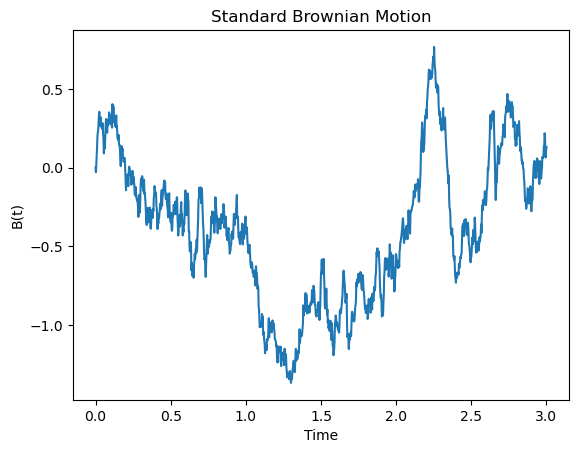

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def brownian_motion_sample(time_end=3, step_size=1/400, seed=None):
    np.random.seed(seed)
    
    num_steps = int(time_end / step_size) + 1
    time_points = np.linspace(0, time_end, num_steps)
    
    # Generate random increments for each time step
    increments = np.sqrt(step_size) * np.random.normal(size=num_steps - 1)
    
    # Calculate cumulative sum to get the Brownian motion
    brownian_motion = np.cumsum(increments)
    
    # Prepend 0 to the Brownian motion to include the starting point
    brownian_motion = np.insert(brownian_motion, 0, 0)
    
    return time_points, brownian_motion

# Run one trial and plot the Brownian motion
time_points, brownian_motion = brownian_motion_sample()

plt.plot(time_points, brownian_motion)
plt.title('Standard Brownian Motion')
plt.xlabel('Time')
plt.ylabel('B(t)')
plt.show()


In [3]:
def simulate_probability_exceeds_1(num_simulations=1000):
    count_exceeds_1 = 0
    
    for _ in range(num_simulations):
        _, brownian_motion = brownian_motion_sample()
        if np.max(brownian_motion) > 1:
            count_exceeds_1 += 1
    
    probability_exceeds_1 = count_exceeds_1 / num_simulations
    return probability_exceeds_1
simulate_probability_exceeds_1()

0.527

In [4]:
def simulate_probability_conditions(num_simulations=1000):
    count_condition = 0
    
    for _ in range(num_simulations):
        time_points, brownian_motion = brownian_motion_sample()
        
        # Check if Brownian motion at t=1.5 is greater than 0
        if (brownian_motion[np.argmin(np.abs(time_points - 1.5))] > 0 and
            brownian_motion[np.argmin(np.abs(time_points - 3))] > 0):
            count_condition += 1
    
    probability_condition = count_condition / num_simulations
    
    return probability_condition
simulate_probability_conditions()

0.376